In [1]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# Параметр squeeze=True загружает набор данных в ивде объекта Series
dataset = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, index_col=0, parse_dates=True)

In [4]:
# Первые 5 строк датасета
dataset.head()

,Sales of shampoo over a three year period
Month,
1-Jan,266.0
1-Feb,145.9
1-Mar,183.1
1-Apr,119.3
1-May,180.3


In [5]:
dataset.dtypes

Sales of shampoo over a three year period    float64
dtype: object

In [6]:
# Основные статистические характеристки набора данных
dataset.describe()

,Sales of shampoo over a three year period
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [7]:
# dataset['Sales of shampoo over a three year period']

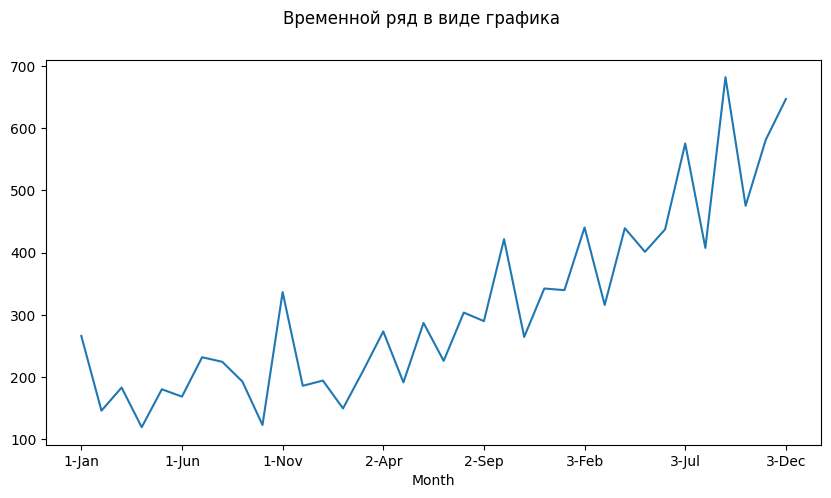

In [8]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
dataset.plot(ax=ax, legend=False)
pyplot.show()

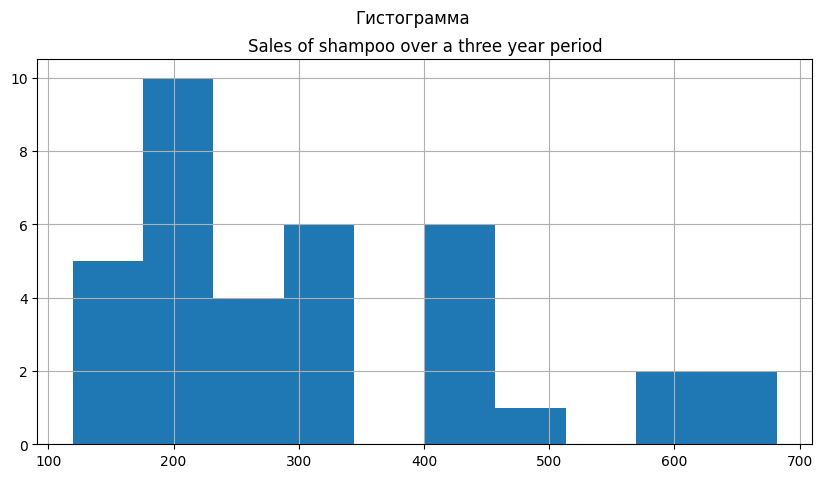

In [9]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
dataset.hist(ax=ax, legend=False)
pyplot.show()

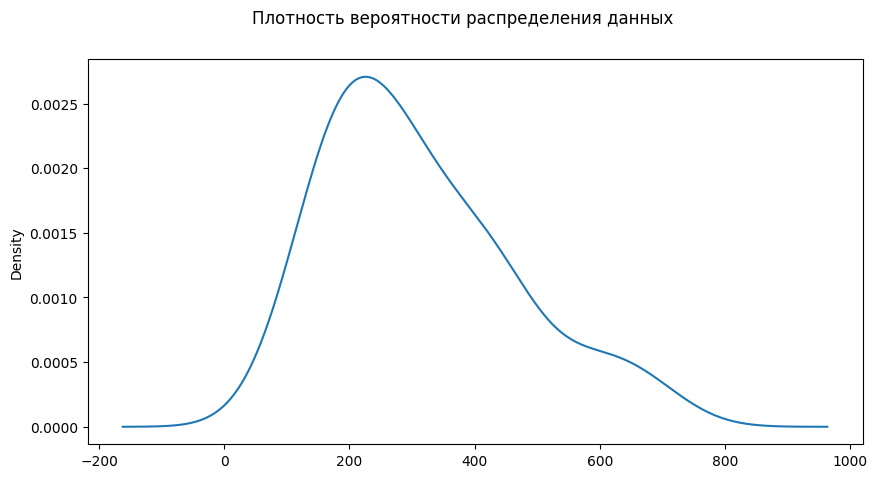

In [10]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
dataset.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

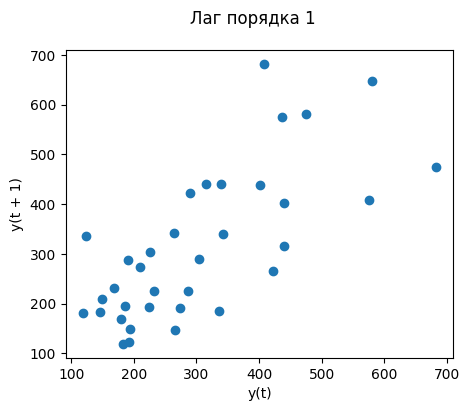

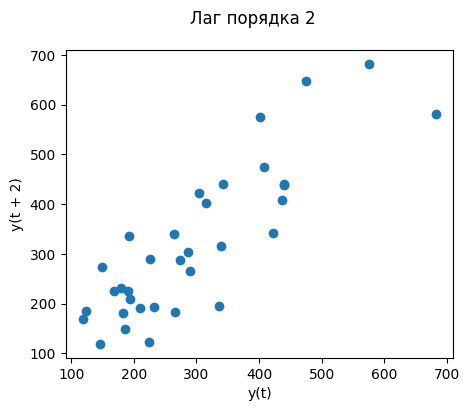

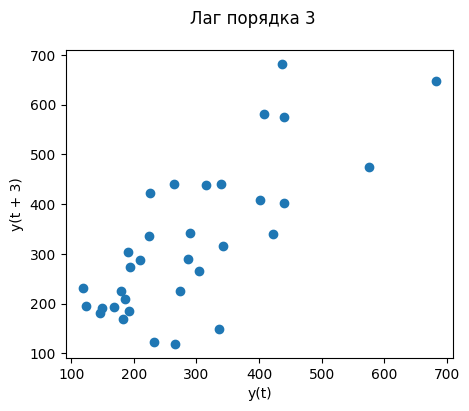

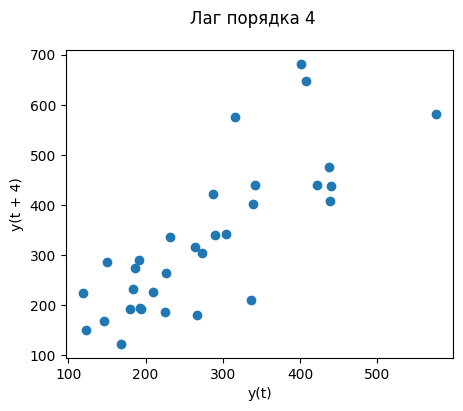

In [11]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(dataset, lag=i, ax=ax)
    pyplot.show()

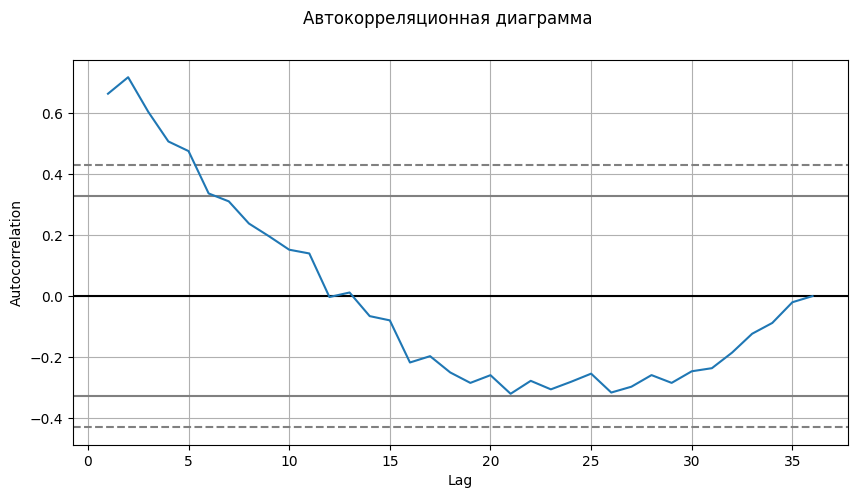

In [12]:
# По оси Y откладывается ковариация 
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(dataset, ax=ax)
pyplot.show()

In [13]:
# Аддитивная модель
def plot_decompose(data=dataset['Sales of shampoo over a three year period'], model='add'):
    result_add = seasonal_decompose(data, model = 'add', period=12)
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

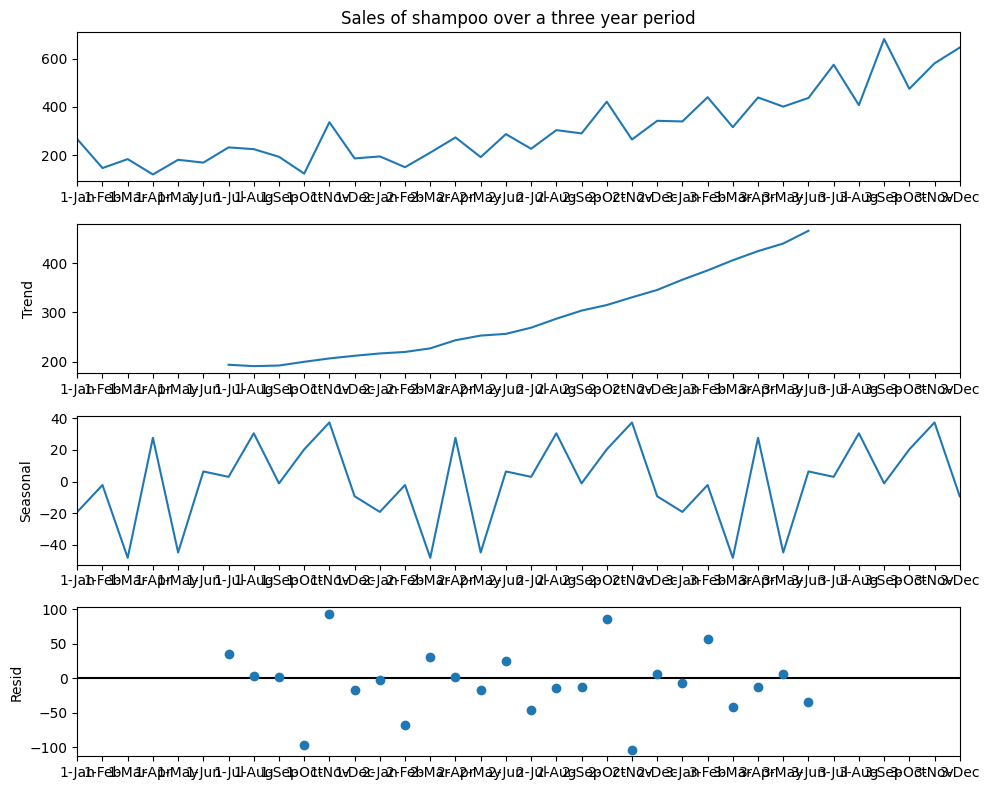

In [14]:
plot_decompose(data=dataset['Sales of shampoo over a three year period'], model='add')

In [16]:
# Целочисленная метка шкалы времени 
xnum = list(range(dataset.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = dataset['Sales of shampoo over a three year period'].values
train_size = 24
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [17]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [18]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [19]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(312.59999999999997, 88.01972520822434, 108.0307667791204)

In [20]:
# Записываем предсказания в DataFrame
dataset['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
dataset['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

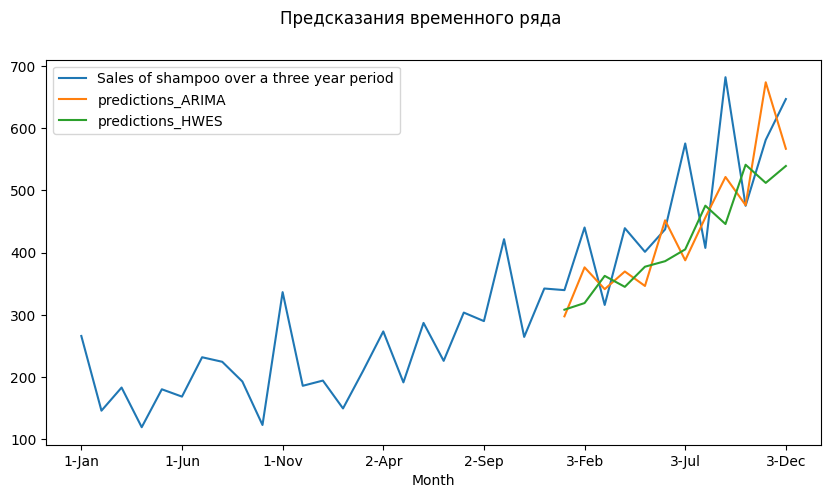

In [21]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
dataset.plot(ax=ax, legend=True)
pyplot.show()

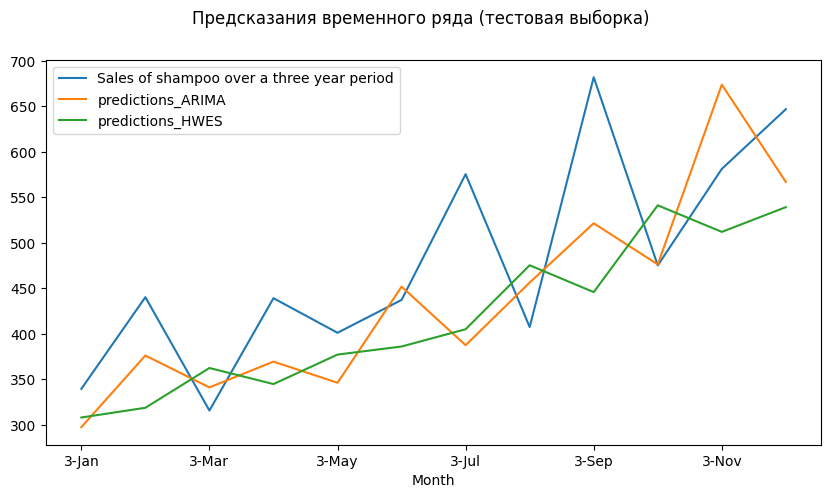

In [22]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
dataset[train_size:].plot(ax=ax, legend=True)
pyplot.show()